In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#06A77D',
    'danger': '#D64933',
    'info': '#6C63FF',
    'warning': '#FFB703'
}

In [4]:
df = pd.read_csv(r'D:\AI\ai2-project\data\1553768847-housing.csv')

print(f"Dataset Shape: {df.shape[0]} rows - {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Shape: 20640 rows - 10 columns
Memory Usage: 2.54 MB


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.230,37.880,41,880,129.000,322,126,8.325,NEAR BAY,452600
1,-122.220,37.860,21,7099,1106.000,2401,1138,8.301,NEAR BAY,358500
2,-122.240,37.850,52,1467,190.000,496,177,7.257,NEAR BAY,352100
3,-122.250,37.850,52,1274,235.000,558,219,5.643,NEAR BAY,341300
4,-122.250,37.850,52,1627,280.000,565,259,3.846,NEAR BAY,342200


In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


In [ ]:
stats_df = pd.DataFrame({
    'Mean': df.select_dtypes(include=[np.number]).mean(),
    'Median': df.select_dtypes(include=[np.number]).median(),
    'Std': df.select_dtypes(include=[np.number]).std(),
    'Min': df.select_dtypes(include=[np.number]).min(),
    'Max': df.select_dtypes(include=[np.number]).max(),
    'Skewness': df.select_dtypes(include=[np.number]).skew(),
    'Kurtosis': df.select_dtypes(include=[np.number]).kurtosis(),
    'Missing': df.isna().sum(),
    'Missing %': (df.isna().sum() / len(df) * 100).round(2)
})
8
display(stats_df)

,Mean,Median,Std,Min,Max,Skewness,Kurtosis,Missing,Missing %
households,499.540,409.000,382.330,1.000,6082.000,3.410,22.058,0,0.000
housing_median_age,28.639,29.000,12.586,1.000,52.000,0.060,-0.801,0,0.000
latitude,35.632,34.260,2.136,32.540,41.950,0.466,-1.118,0,0.000
longitude,-119.570,-118.490,2.004,-124.350,-114.310,-0.298,-1.330,0,0.000
median_house_value,206855.817,179700.000,115395.616,14999.000,500001.000,0.978,0.328,0,0.000
median_income,3.871,3.535,1.900,0.500,15.000,1.647,4.953,0,0.000
ocean_proximity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000
population,1425.477,1166.000,1132.462,3.000,35682.000,4.936,73.553,0,0.000
total_bedrooms,537.871,435.000,421.385,1.000,6445.000,3.460,21.986,207,1.000
total_rooms,2635.763,2127.000,2181.615,2.000,39320.000,4.147,32.631,0,0.000


In [10]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
df['ocean_proximity'].value_counts(normalize=True) * 100

ocean_proximity
<1H OCEAN    44.264
INLAND       31.739
NEAR OCEAN   12.878
NEAR BAY     11.095
ISLAND        0.024
Name: proportion, dtype: float64

,Missing Count,Percentage
total_bedrooms,207,1.000


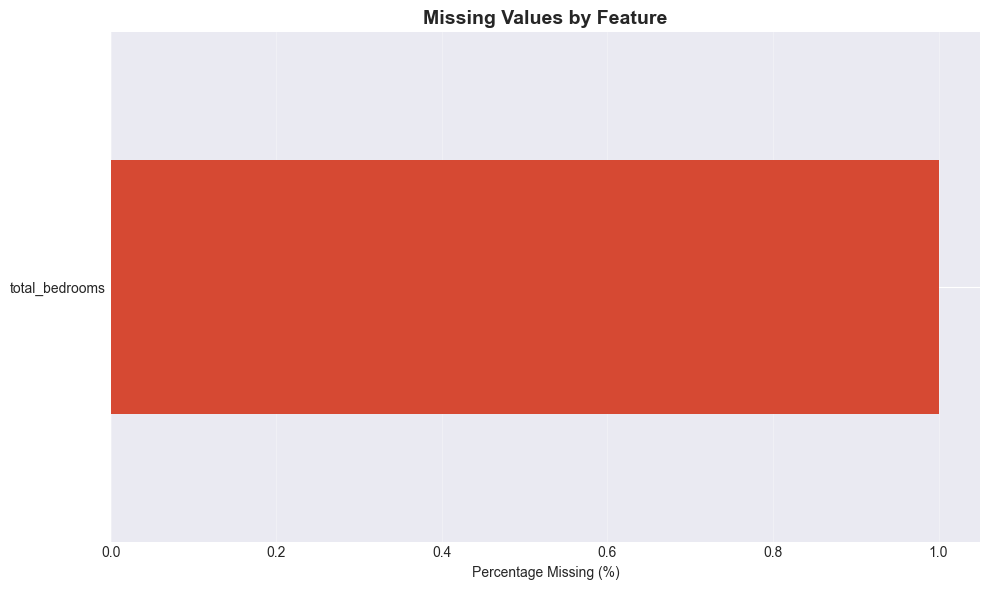

In [ ]:
missing_data = pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Percentage': (df.isna().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_data['Percentage'].plot(kind='barh', color=COLORS['danger'], ax=ax)
    ax.set_xlabel('Percentage Missing (%)')
    ax.set_title('Missing Values by Feature', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates/len(df)*100):.2f}%")

Number of duplicate rows: 0
Percentage of duplicates: 0.00%


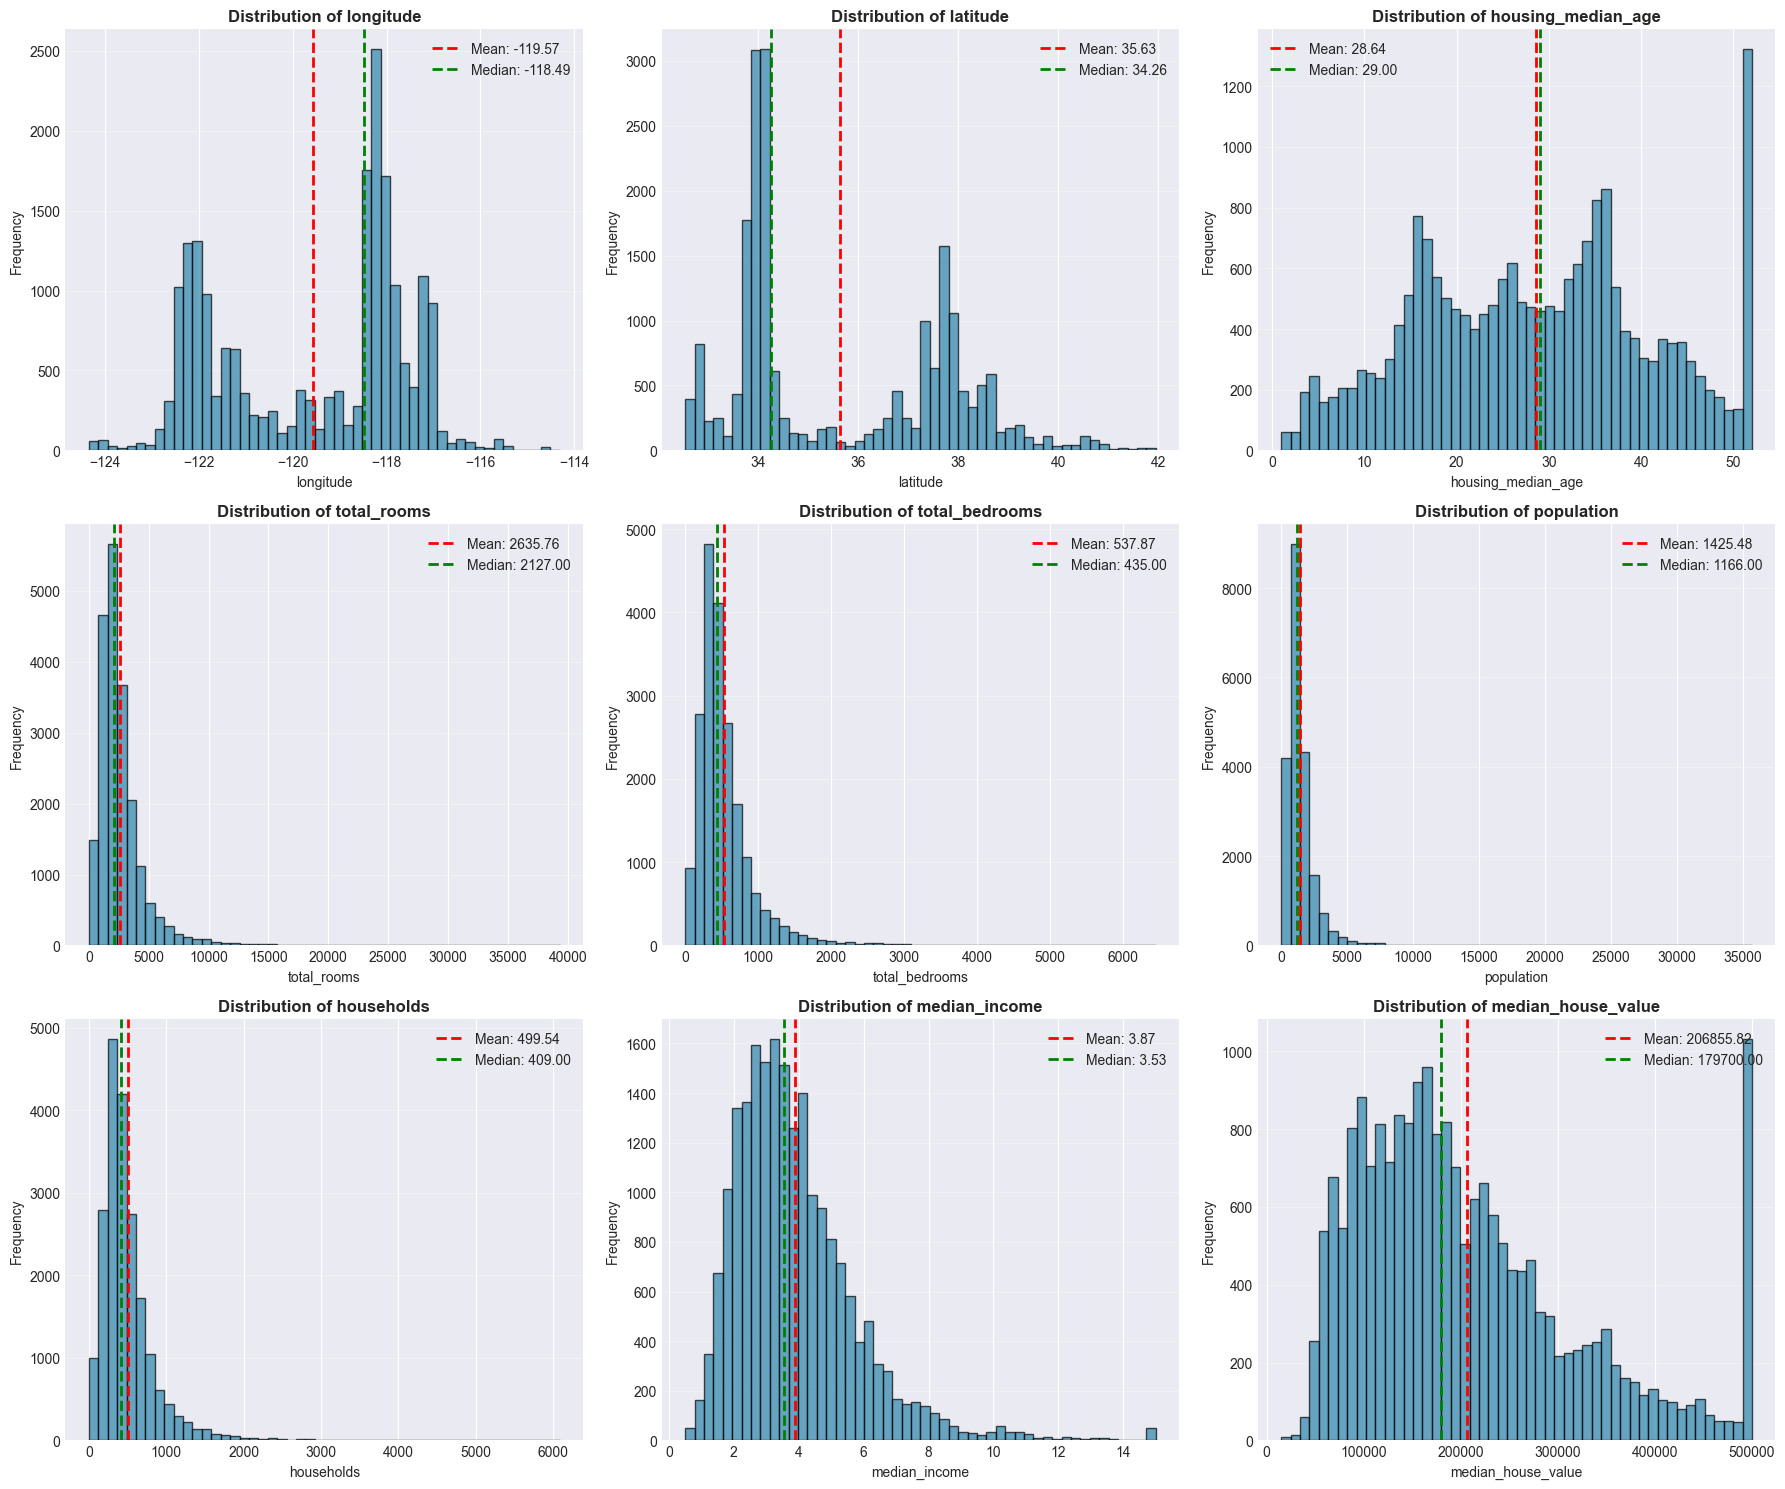

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    ax.hist(df[col].dropna(), bins=50, color=COLORS['primary'], alpha=0.7, edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

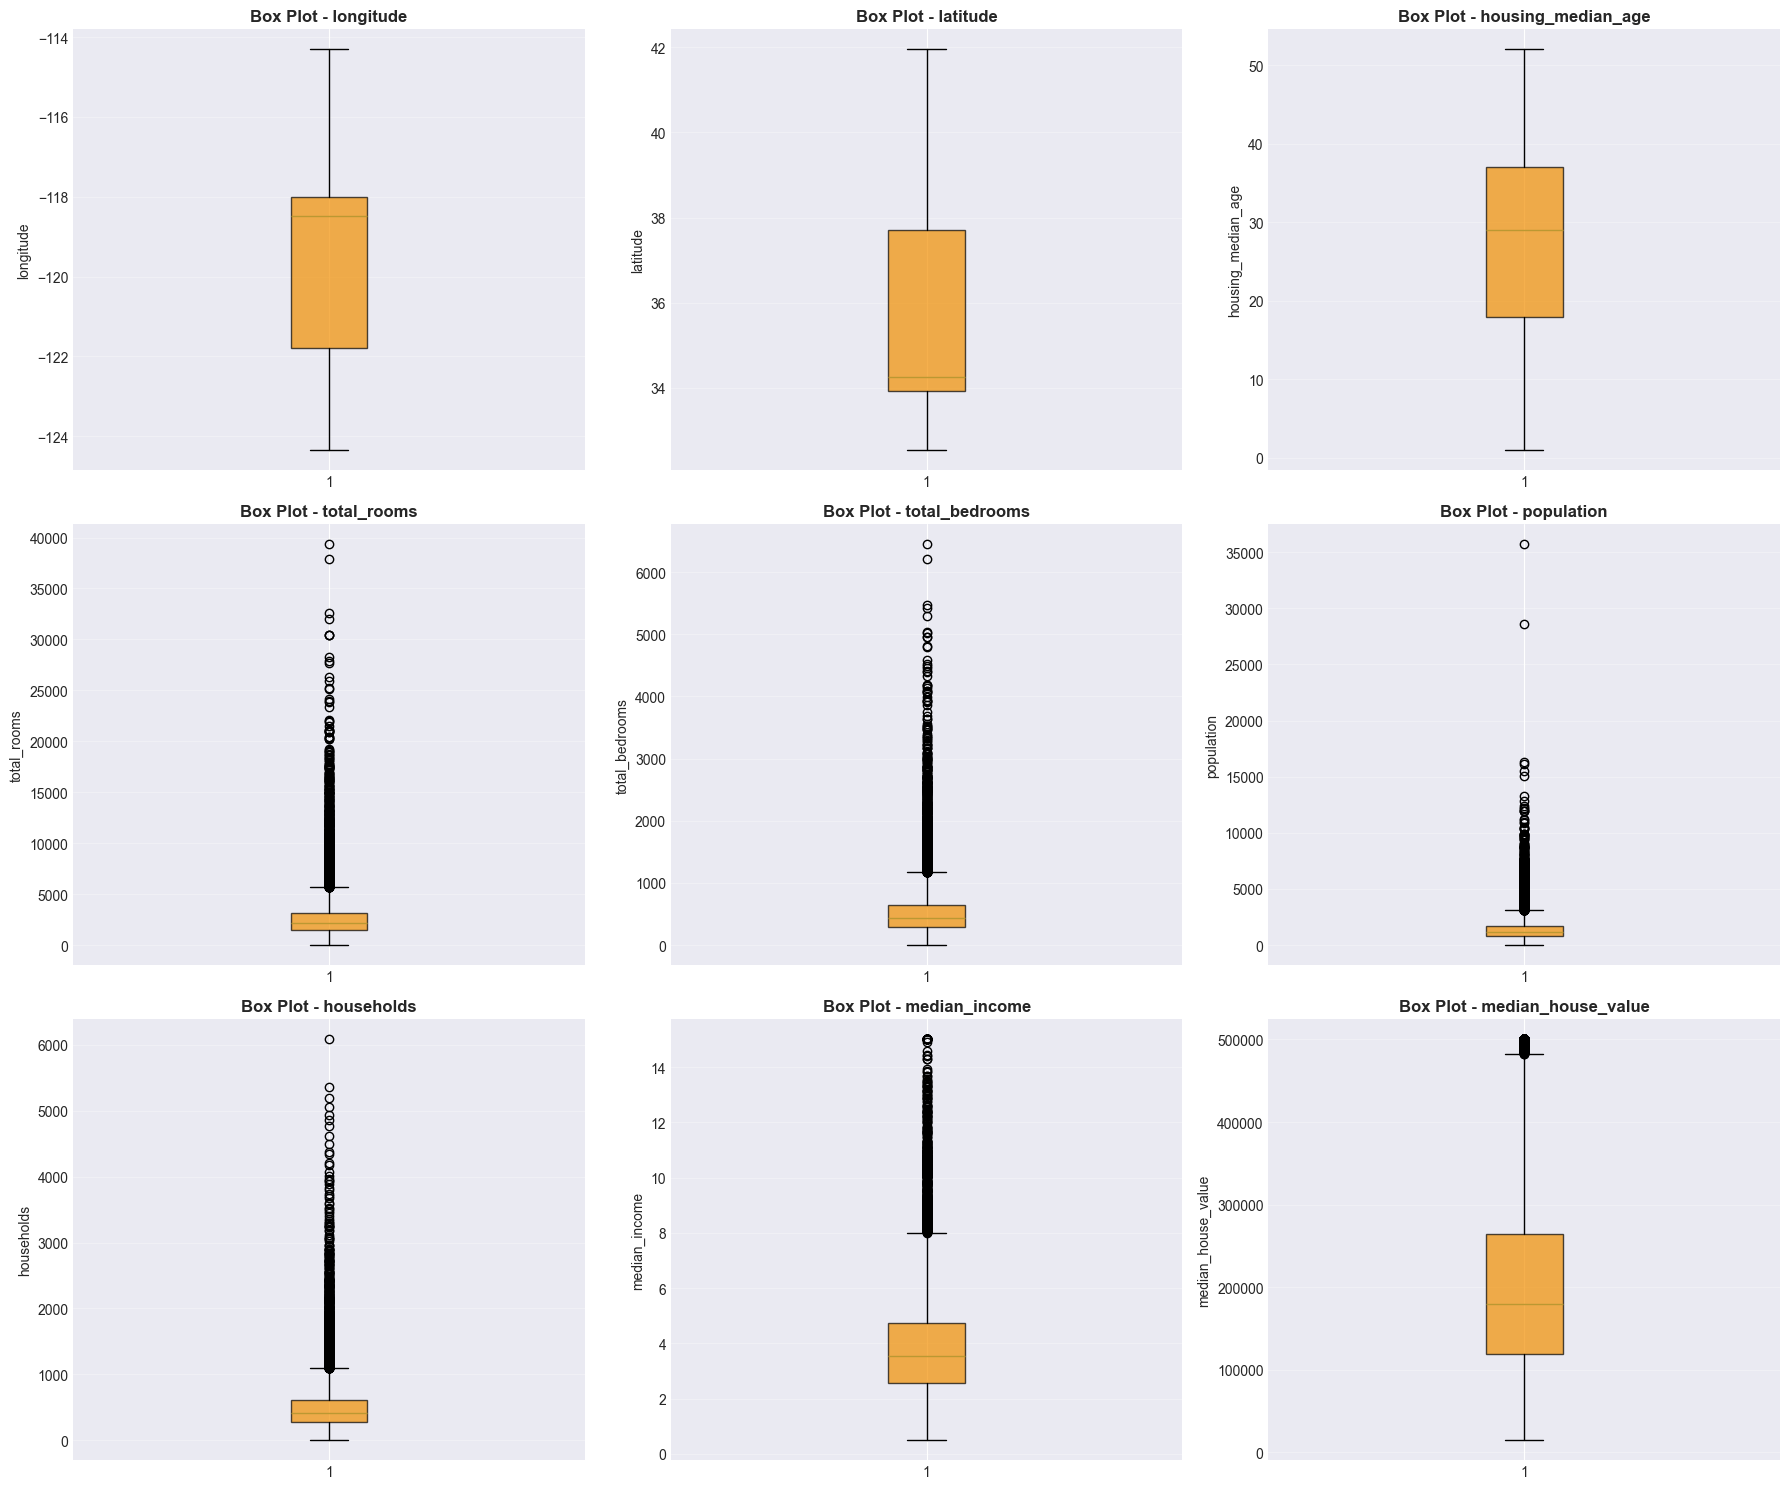

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor(COLORS['accent'])
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_ylabel(col)
    ax.set_title(f'Box Plot - {col}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

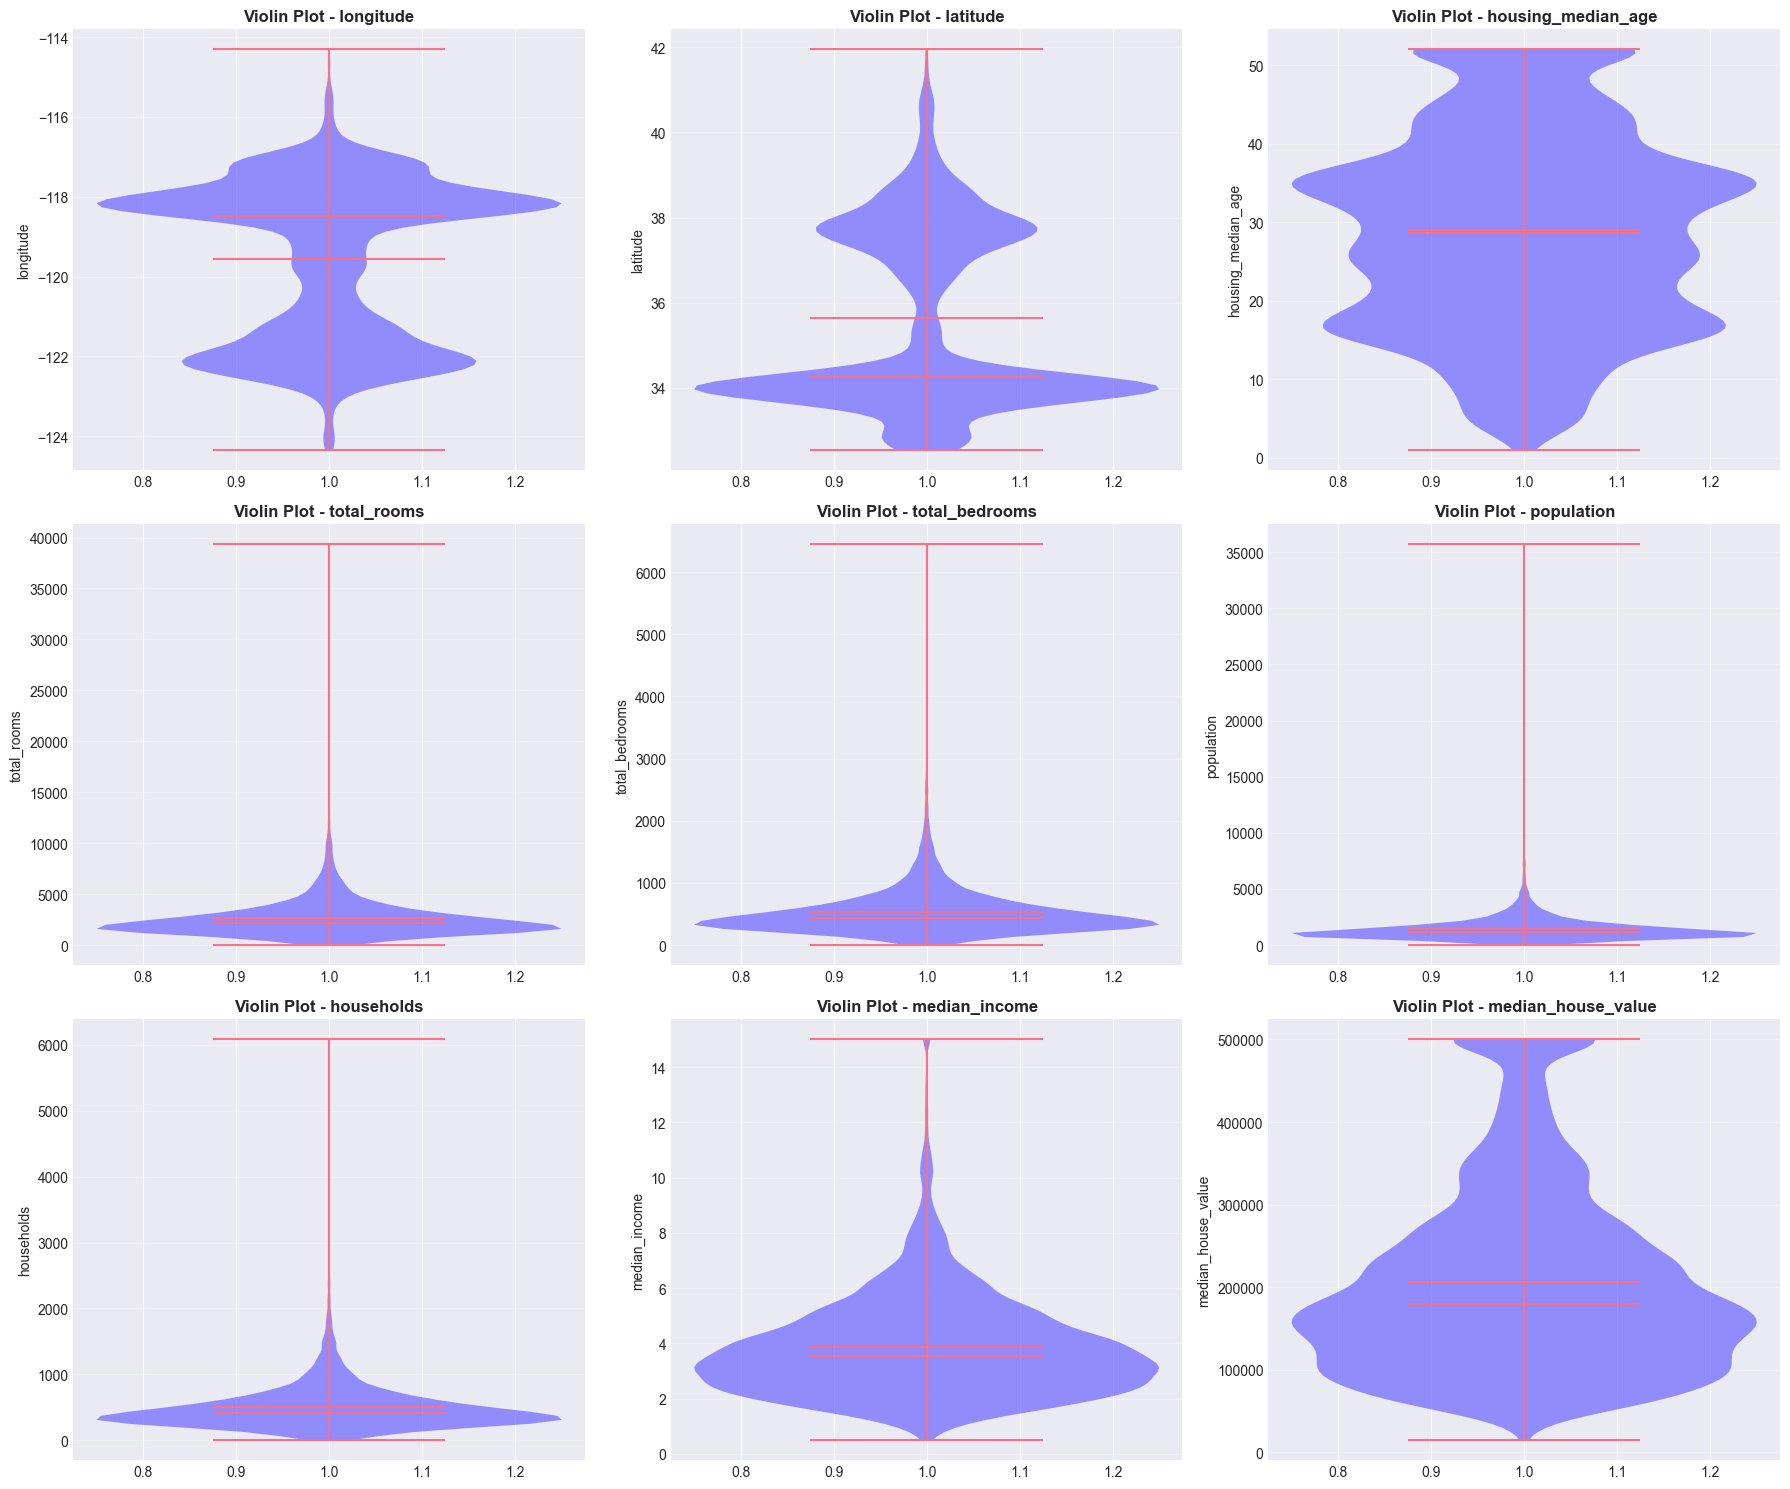

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    parts = ax.violinplot([df[col].dropna()], vert=True, showmeans=True, showmedians=True)
    
    for pc in parts['bodies']:
        pc.set_facecolor(COLORS['info'])
        pc.set_alpha(0.7)
    
    ax.set_ylabel(col)
    ax.set_title(f'Violin Plot - {col}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

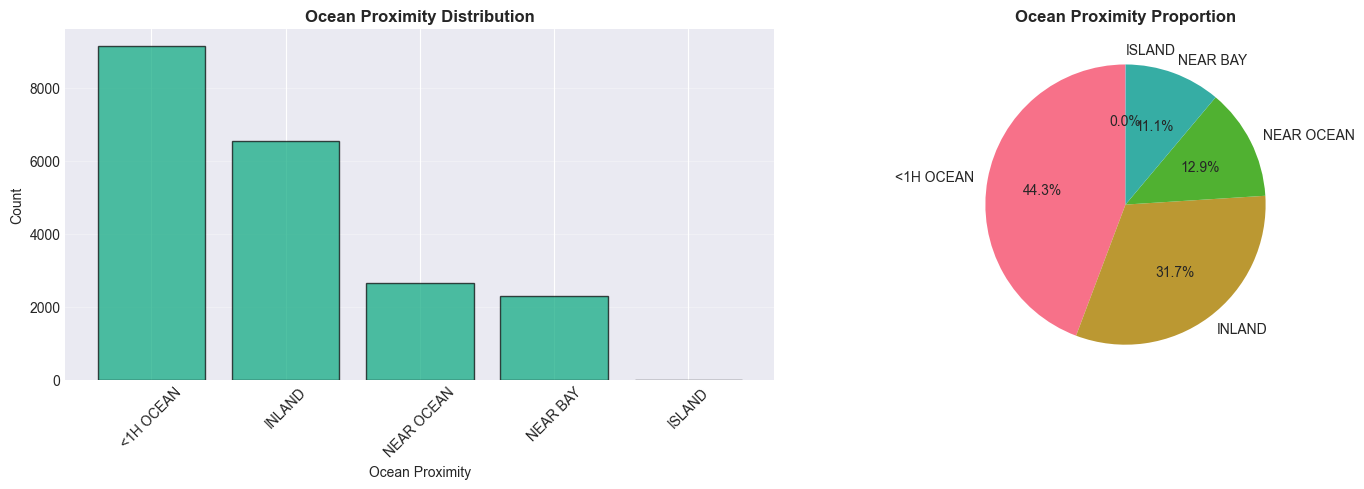

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ocean_counts = df['ocean_proximity'].value_counts()
axes[0].bar(ocean_counts.index, ocean_counts.values, color=COLORS['success'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Ocean Proximity')
axes[0].set_ylabel('Count')
axes[0].set_title('Ocean Proximity Distribution', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(ocean_counts.values, labels=ocean_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Ocean Proximity Proportion', fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

target_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
print(target_corr)

median_house_value    1.000
median_income         0.688
total_rooms           0.134
housing_median_age    0.106
households            0.066
total_bedrooms        0.050
population           -0.025
longitude            -0.046
latitude             -0.144
Name: median_house_value, dtype: float64


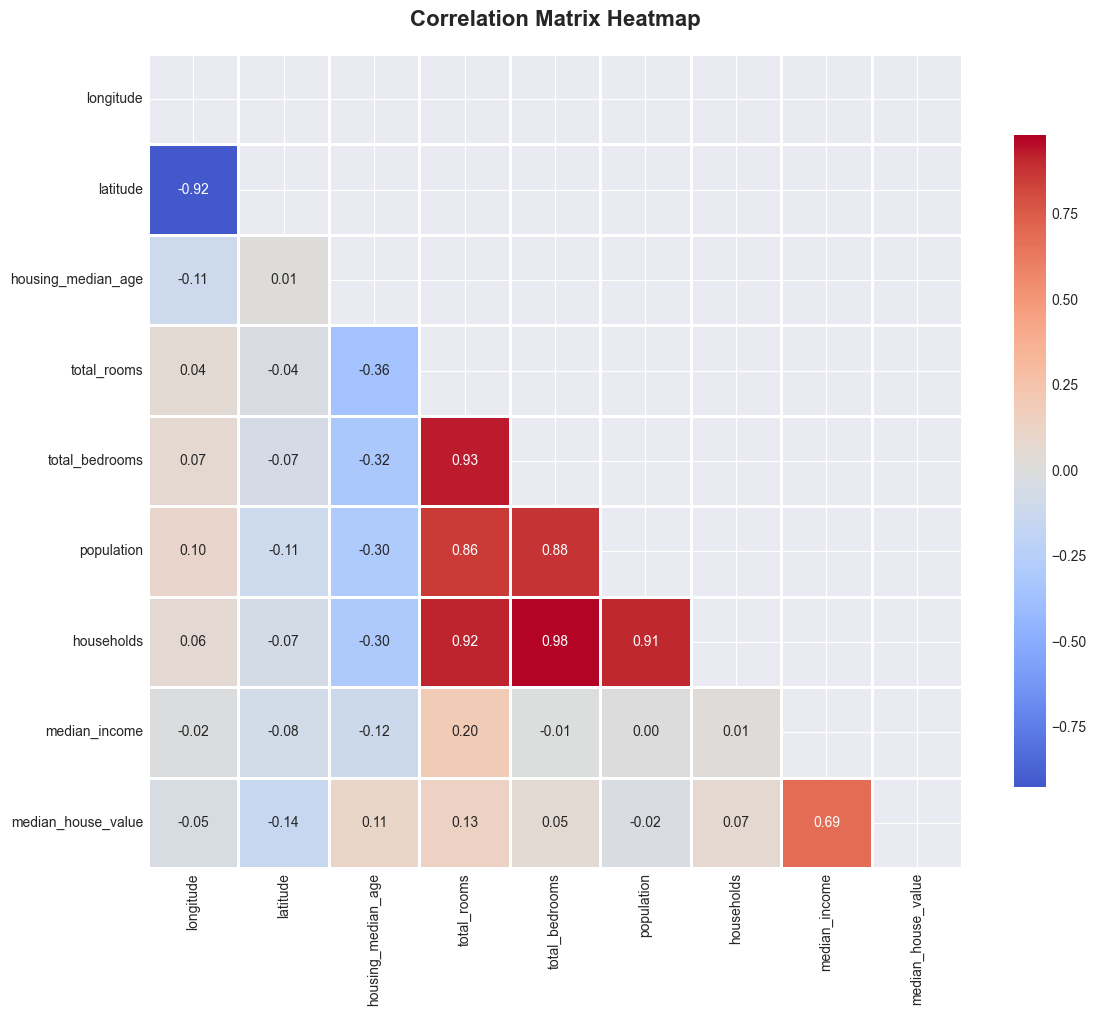

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    center=0, 
    square=True, 
    linewidths=1, 
    cbar_kws={"shrink": 0.8}, 
    ax=ax
)
ax.set_title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

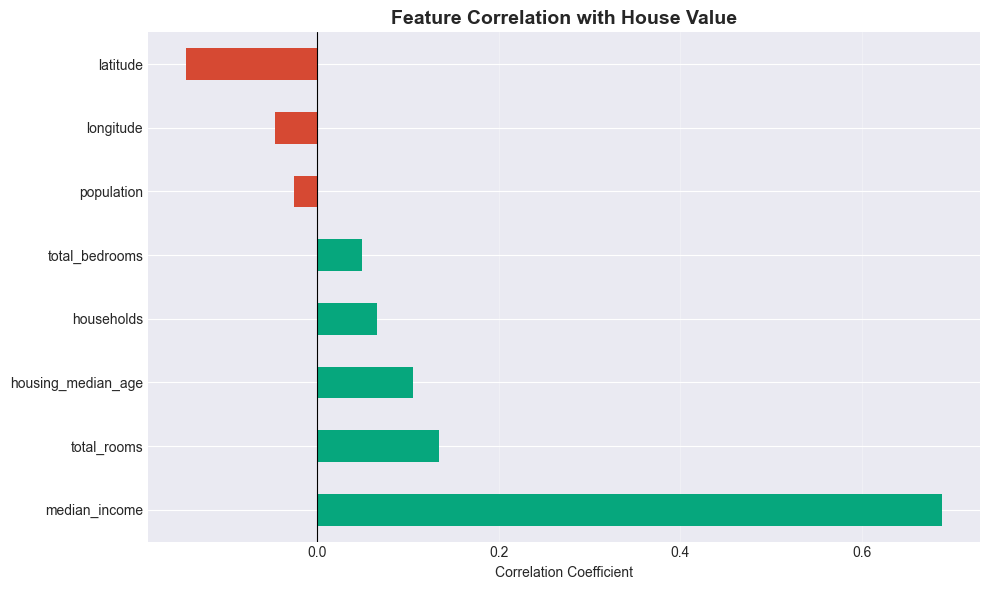

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
target_corr_filtered = target_corr.drop('median_house_value')
colors = [COLORS['success'] if x > 0 else COLORS['danger'] for x in target_corr_filtered.values]
target_corr_filtered.plot(kind='barh', color=colors, ax=ax)
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Feature Correlation with House Value', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

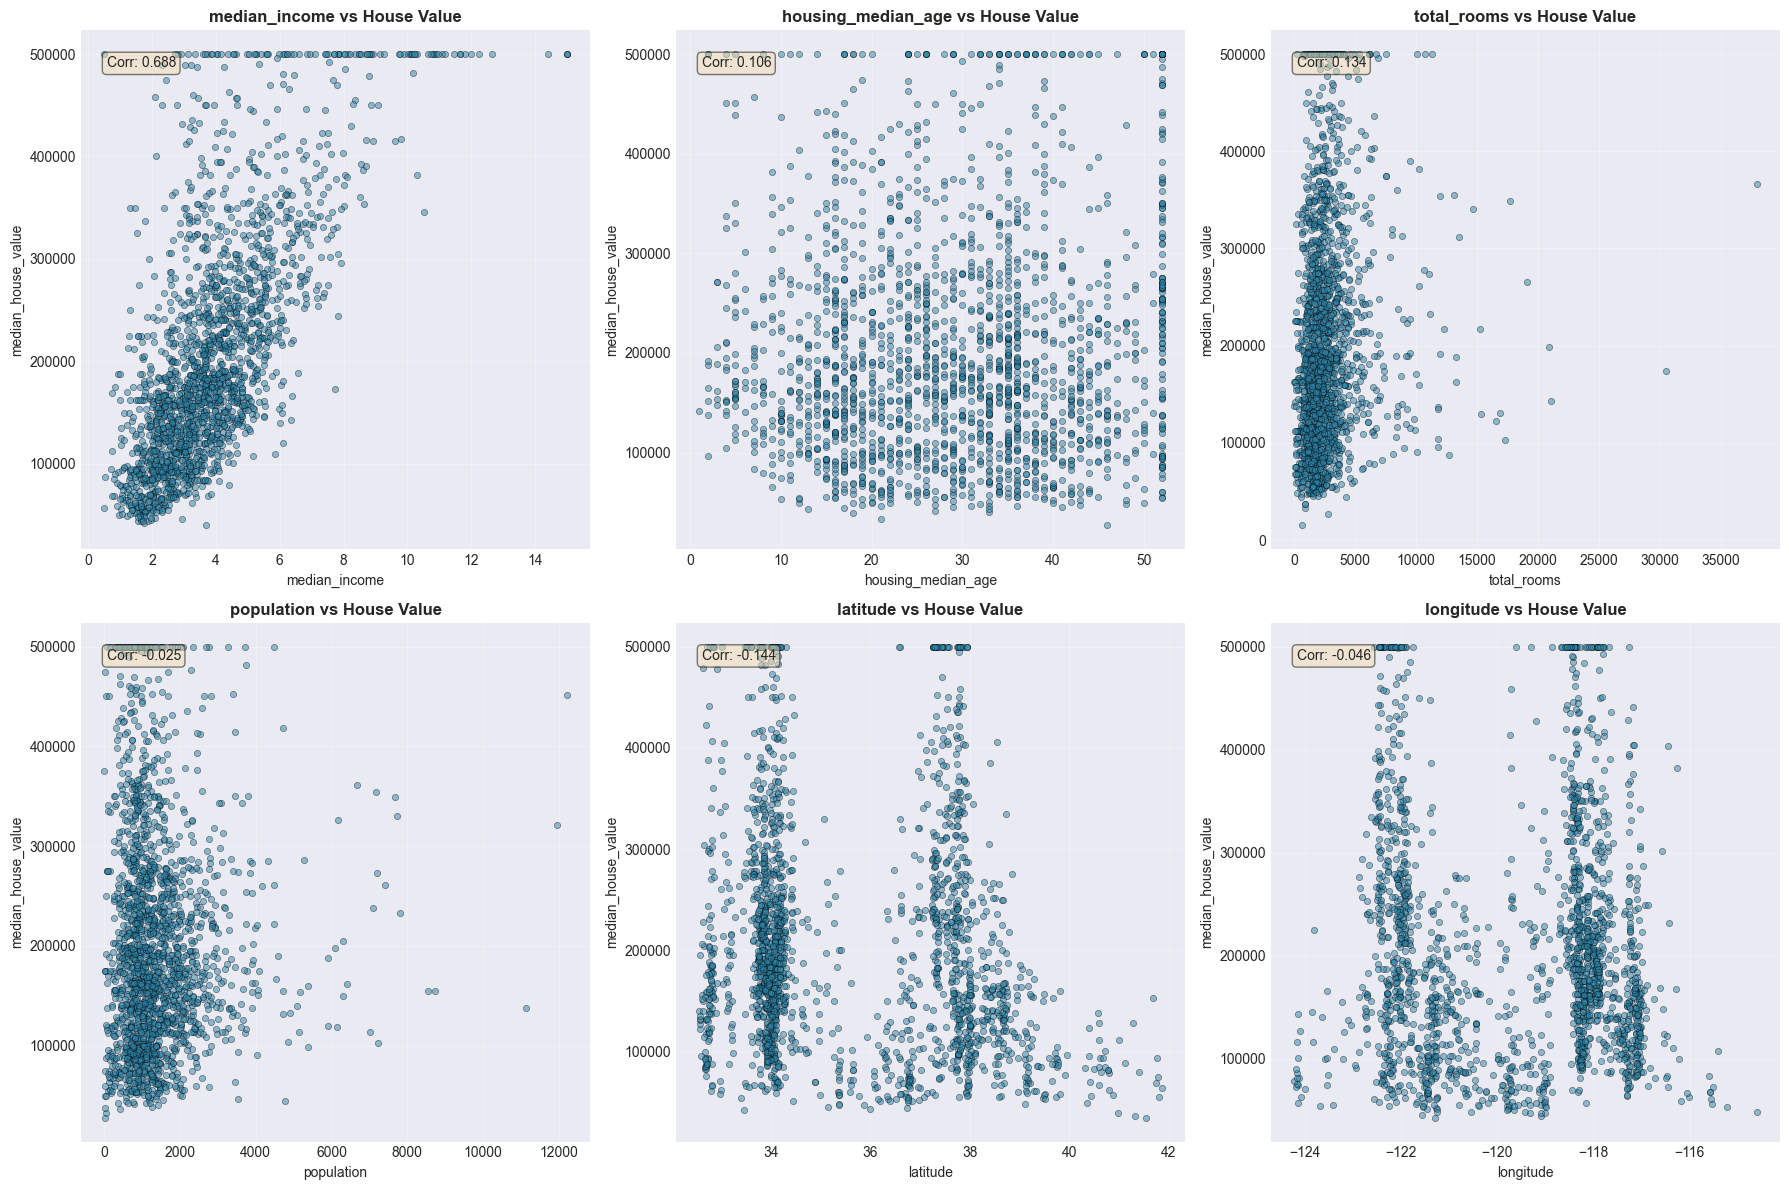

In [ ]:
key_features = ['median_income', 'housing_median_age', 'total_rooms', 'population', 'latitude', 'longitude']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    ax = axes[idx]
    
    sample_df = df.sample(min(2000, len(df)))
    
    ax.scatter(sample_df[feature], sample_df['median_house_value'], 
               alpha=0.5, c=COLORS['primary'], s=20, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('median_house_value')
    ax.set_title(f'{feature} vs House Value', fontweight='bold')
    ax.grid(alpha=0.3)
    
    corr = df[[feature, 'median_house_value']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Corr: {corr:.3f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


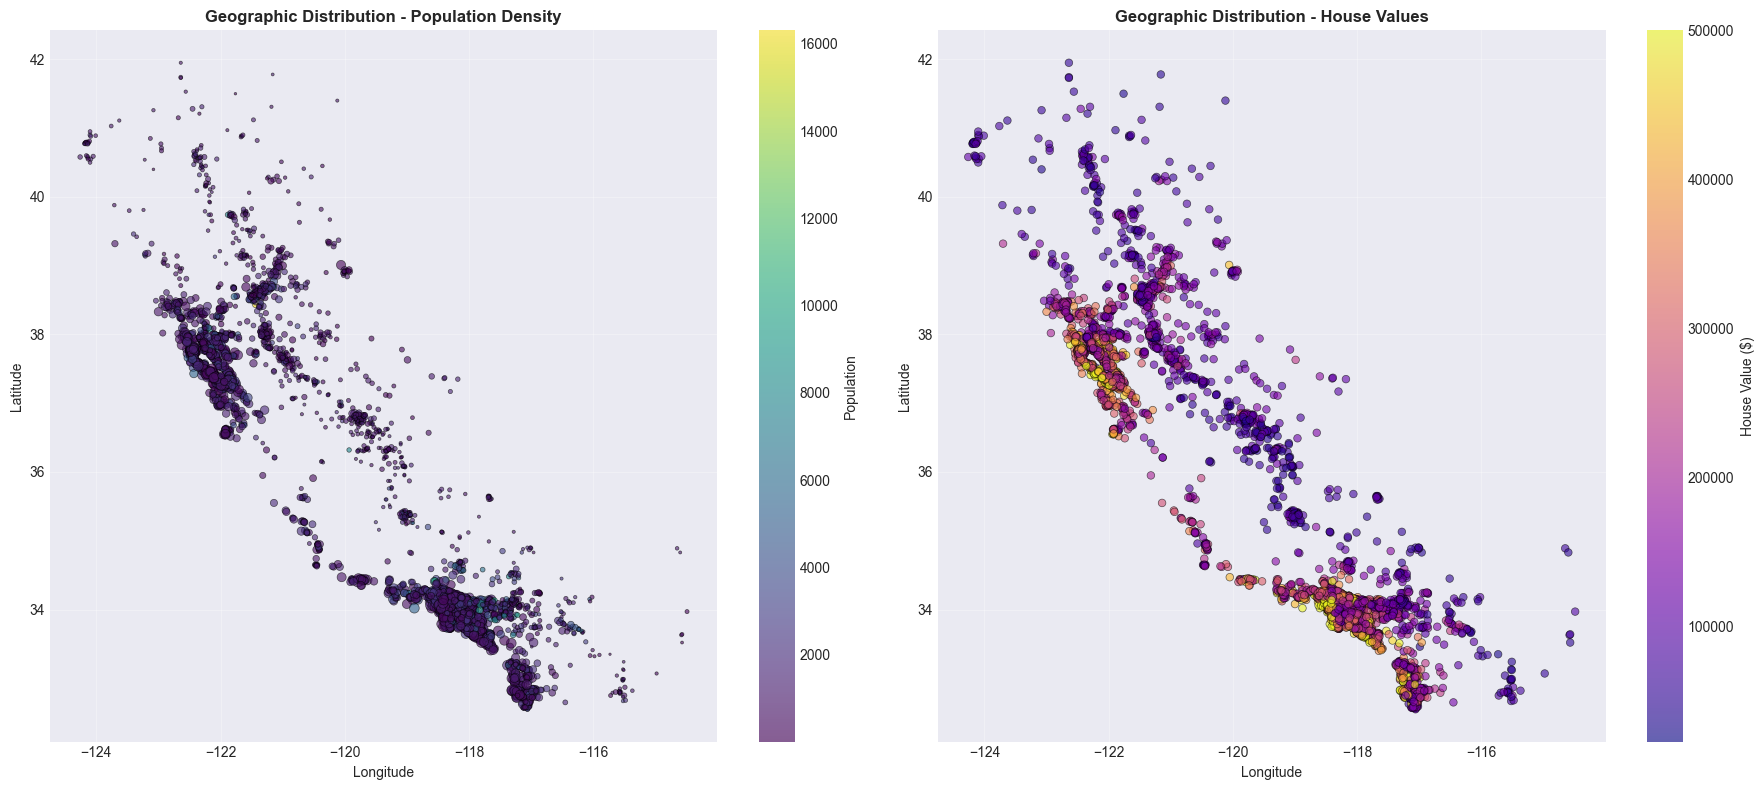

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sample_geo = df.sample(min(5000, len(df)))

scatter1 = axes[0].scatter(
    sample_geo['longitude'], 
    sample_geo['latitude'], 
    c=sample_geo['population'], 
    s=sample_geo['median_house_value']/10000,
    alpha=0.6, 
    cmap='viridis', 
    edgecolors='black', 
    linewidth=0.5
)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Geographic Distribution - Population Density', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Population')
axes[0].grid(alpha=0.3)

scatter2 = axes[1].scatter(
    sample_geo['longitude'], 
    sample_geo['latitude'], 
    c=sample_geo['median_house_value'], 
    s=30,
    alpha=0.6, 
    cmap='plasma', 
    edgecolors='black', 
    linewidth=0.5
)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Geographic Distribution - House Values', fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='House Value ($)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

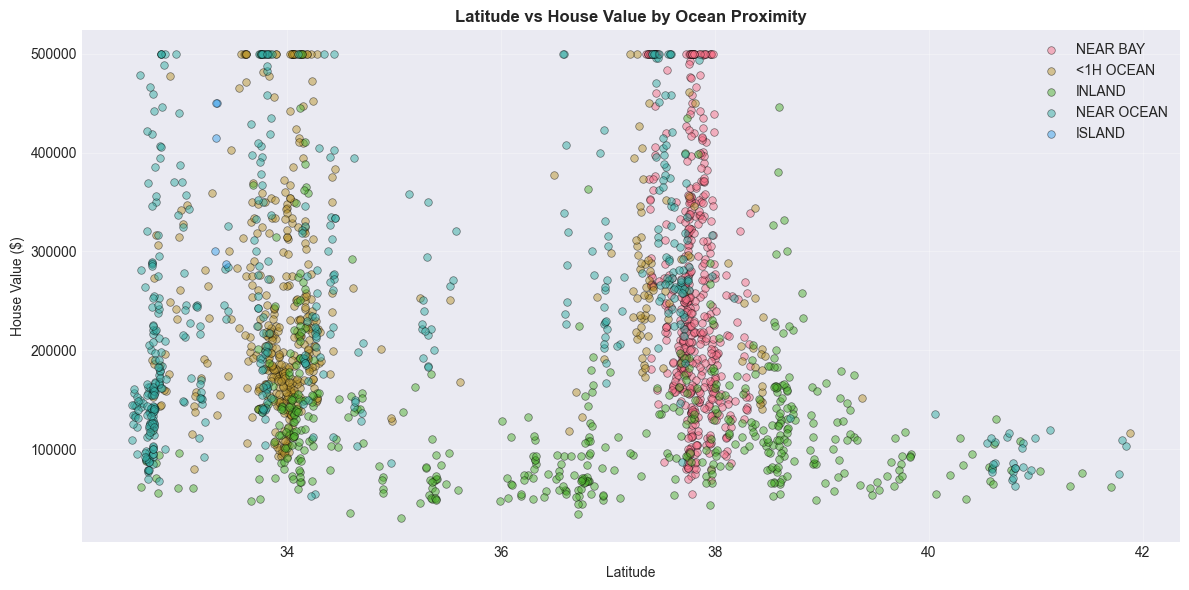

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for proximity in df['ocean_proximity'].unique():
    subset = df[df['ocean_proximity'] == proximity].sample(min(500, len(df[df['ocean_proximity'] == proximity])))
    ax.scatter(
        subset['latitude'], 
        subset['median_house_value'], 
        alpha=0.5, 
        label=proximity, 
        s=30, 
        edgecolors='black', 
        linewidth=0.5
    )

ax.set_xlabel('Latitude')
ax.set_ylabel('House Value ($)')
ax.set_title('Latitude vs House Value by Ocean Proximity', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

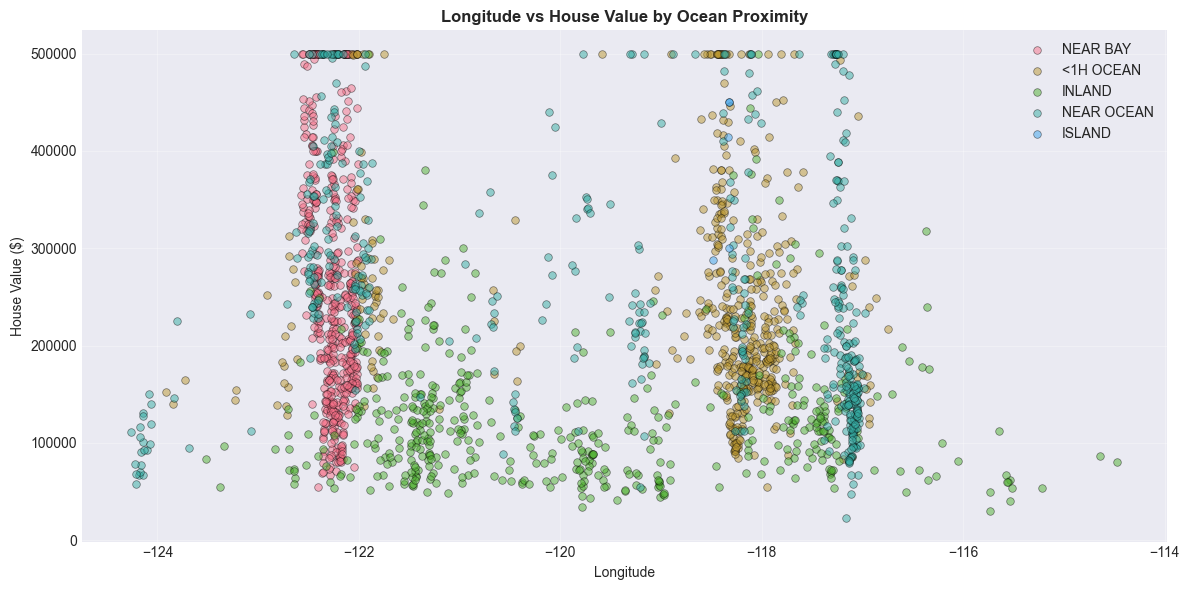

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for proximity in df['ocean_proximity'].unique():
    subset = df[df['ocean_proximity'] == proximity].sample(min(500, len(df[df['ocean_proximity'] == proximity])))
    ax.scatter(
        subset['longitude'], 
        subset['median_house_value'], 
        alpha=0.5, 
        label=proximity, 
        s=30, 
        edgecolors='black', 
        linewidth=0.5
    )

ax.set_xlabel('Longitude')
ax.set_ylabel('House Value ($)')
ax.set_title('Longitude vs House Value by Ocean Proximity', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()